In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 로드
df = pd.read_csv("modified_h4_summary.csv")

# 스타일 설정
sns.set(style="whitegrid")

In [2]:
pd.set_option('display.max_columns', None)  # 모든 열 표시
pd.set_option('display.max_rows', None)  # 모든 행 표시

# 데이터프레임 출력
df

,work,hot,cold,trial,time(s),hot_column_key,default_column_key,rocksdb.flush.write.bytes,rocksdb.compact.write.bytes,rocksdb.bytes.written,rocksdb.number.keys.read,rocksdb.bytes.read,rocksdb.block.cache.hit,rocksdb.block.cache.miss,rocksdb.memtable.hit,rocksdb.memtable.miss,rocksdb.db.get.micros,rocksdb.db.write.micros,rocksdb.db.seek.micros,rocksdb.compaction.total.time.cpu_micros,rocksdb.bytes.compressed.from,rocksdb.bytes.compressed.to,get.P50,get.P95,get.P99,get.P100,get.COUNT,get.SUM,get.AVG,write.P50,write.P95,write.P99,write.P100,write.COUNT,write.SUM,write.AVG,WAF,RAF,cache_hit_ratio,memtable_hit_ratio,throughput,compression_ratio,case
0,read,LZ4,Zlib,2,24.314,679362,0,0,334523,0,1000000,12659818496,1141503,1696079,0,1000000,0,0,0,0,62018794,313573,8.688403,92.452930,107.570592,784.0,1000000,23208530,23.208530,0.000000,0.000000,0.000000,0.0,0,0,0.000000,0.000000,1.294173,0.402280,0.000000,0.000000e+00,197.781040,1
1,read,Snappy,ZSTD,1,11.830,678638,0,0,853594,0,1000000,12656115712,1192057,1263358,0,1000000,0,0,0,0,61954404,832663,8.896087,18.084461,21.627374,768.0,1000000,10589710,10.589710,0.000000,0.000000,0.000000,0.0,0,0,0.000000,0.000000,1.294552,0.485481,0.000000,0.000000e+00,74.405136,6
2,read,none,ZSTD,2,21.091,678608,0,0,2114885947,0,1000000,12643778560,658150,3730954,0,1000000,0,0,0,1719046,36232737,121925,16.503120,47.175926,66.397294,1768.0,1000000,19716978,19.716978,0.000000,0.000000,0.000000,0.0,0,0,0.000000,0.000000,1.295815,0.149951,0.000000,0.000000e+00,297.172335,4
3,read,Snappy,Snappy,1,20.867,678600,0,0,201724887,0,1000000,12659474432,219891,2672206,0,1000000,0,0,0,2914179,4069768137,200479868,9.283244,50.832027,71.299575,796.0,1000000,19574484,19.574484,0.000000,0.000000,0.000000,0.0,0,0,0.000000,0.000000,1.294209,0.076032,0.000000,0.000000e+00,20.300134,0
4,write,Snappy,Zlib,1,205.980,0,250961,579596782,2630024822,16407310193,1806052,7289389056,8307136,5395064,7755,1798297,0,0,0,104748457,85258050781,3183367964,2.013612,27.858383,44.965496,1053.0,1806052,14386003,7.965442,8.427429,13.872257,18.192436,3397636.0,1000000,204604063,204.604063,0.195621,4.059374,0.606263,0.004294,7.965487e+07,26.782342,5
5,write,Snappy,Zlib,3,251.382,0,250647,582799400,2794161050,16407310576,1806047,7284326400,6582383,5639556,3778,1802269,0,0,0,109521071,89333834920,3349457628,1.960597,23.997822,45.440049,798.0,1806047,13506835,7.478673,8.403924,13.854018,20.905573,4207485.0,1000000,249943394,249.943394,0.205820,4.062184,0.538571,0.002092,6.526844e+07,26.671135,5
6,write,Snappy,Zlib,2,187.347,0,250324,582735306,2636250077,16407311069,1806116,7277903872,5887314,5210088,3772,1802344,0,0,0,95773948,83380148594,3193305391,2.665865,27.745932,45.201586,793.0,1806116,12663682,7.011555,8.519034,14.146075,21.455537,3085047.0,1000000,185807323,185.807323,0.196192,4.065924,0.530513,0.002088,8.757712e+07,26.110922,5
7,write,Snappy,ZSTD,3,226.802,0,250171,579075930,3064465116,16407311368,1805920,7278608384,5255702,5976683,3775,1802145,0,0,0,56868625,96023403936,3613994699,2.224221,13.405911,21.474886,783.0,1805920,7892066,4.370108,8.396168,14.062344,31.633969,3796554.0,1000000,225267342,225.267342,0.222068,4.065089,0.467906,0.002090,7.234200e+07,26.569880,6
8,read,Snappy,Snappy,2,18.913,678674,0,0,3093595,0,1000000,12653805568,1162824,2025128,0,1000000,0,0,0,0,62056292,3072628,9.452199,46.592771,62.517001,787.0,1000000,17727709,17.727709,0.000000,0.000000,0.000000,0.0,0,0,0.000000,0.000000,1.294788,0.364756,0.000000,0.000000e+00,20.196487,0
9,read,Snappy,Zlib,1,30.800,678559,0,0,3510695,0,1000000,12659523584,738565,2086566,0,1000000,0,0,0,0,127379361,3469842,18.750786,95.811856,108.554649,889.0,1000000,29503313,29.503313,0.000000,0.000000,0.000000,0.0,0,0,0.000000,0.000000,1.294204,0.261427,0.000000,0.000000e+00,36.710421,5


In [3]:
# 작업 유형별로 필터링
df_read = df[df['work'] == 'read']
df_write = df[df['work'] == 'write']

In [4]:
df_write_avg = df_write.groupby('case').mean(numeric_only=True).reset_index()
df_write_avg

,case,trial,time(s),hot_column_key,default_column_key,rocksdb.flush.write.bytes,rocksdb.compact.write.bytes,rocksdb.bytes.written,rocksdb.number.keys.read,rocksdb.bytes.read,rocksdb.block.cache.hit,rocksdb.block.cache.miss,rocksdb.memtable.hit,rocksdb.memtable.miss,rocksdb.db.get.micros,rocksdb.db.write.micros,rocksdb.db.seek.micros,rocksdb.compaction.total.time.cpu_micros,rocksdb.bytes.compressed.from,rocksdb.bytes.compressed.to,get.P50,get.P95,get.P99,get.P100,get.COUNT,get.SUM,get.AVG,write.P50,write.P95,write.P99,write.P100,write.COUNT,write.SUM,write.AVG,WAF,RAF,cache_hit_ratio,memtable_hit_ratio,throughput,compression_ratio
0,0,2.0,243.920333,0.0,250319.666667,8.039193e+08,3.816924e+09,1.640731e+10,1.806068e+06,7.278625e+09,6.641798e+06,5.792907e+06,4195.333333,1.801872e+06,0.0,0.0,0.0,5.732423e+07,9.314952e+10,4.592171e+09,2.856904,14.990046,23.875748,793.000000,1.806068e+06,9.614226e+06,5.323302,8.528330,14.420797,30.407905,4.153061e+06,1000000.0,2.424095e+08,242.409535,0.281633,4.065414,0.529406,0.002323,6.773313e+07,20.284408
1,1,2.0,212.126333,0.0,249954.333333,1.014797e+08,4.463376e+08,1.640731e+10,1.805974e+06,7.274174e+09,7.435175e+06,5.523281e+06,3775.666667,1.802198e+06,0.0,0.0,0.0,9.631008e+07,8.853679e+10,5.205898e+08,3.322261,23.700318,39.828759,879.000000,1.805974e+06,1.261328e+07,6.984211,8.517604,14.142911,23.937115,3.840497e+06,1000000.0,2.105355e+08,210.535522,0.033389,4.067690,0.562120,0.002091,8.033761e+07,170.109487
2,2,2.0,248.571333,0.0,250162.666667,9.780132e+07,4.738812e+08,1.640731e+10,1.805998e+06,7.277188e+09,4.934090e+06,5.848837e+06,4795.000000,1.801203e+06,0.0,0.0,0.0,4.220473e+07,9.397209e+10,5.427967e+08,2.073197,9.761954,15.357551,345.000000,1.805998e+06,7.048561e+06,3.902867,8.473804,14.251479,29.919568,4.151452e+06,1000000.0,2.471228e+08,247.122839,0.034843,4.066061,0.456122,0.002655,6.762075e+07,173.125782
3,3,2.0,638.434333,0.0,250094.000000,1.129535e+10,2.870579e+10,1.640731e+10,1.806026e+06,7.275610e+09,1.975686e+07,3.650451e+06,6403.000000,1.799623e+06,0.0,0.0,0.0,7.451153e+07,1.692666e+10,6.800734e+07,7.871033,32.061367,47.404889,803.333333,1.806026e+06,2.125999e+07,11.771695,8.507612,18.724170,38.153686,1.143249e+07,1000000.0,6.367356e+08,636.735644,2.438007,4.067006,0.843936,0.003545,2.685635e+07,248.828903
4,4,2.0,564.752333,0.0,250041.666667,1.129219e+10,2.887628e+10,1.640731e+10,1.806006e+06,7.275080e+09,1.171273e+07,3.695800e+06,5093.333333,1.800913e+06,0.0,0.0,0.0,3.837740e+07,1.847747e+10,6.058077e+07,5.386878,14.836438,25.869950,778.333333,1.806006e+06,1.152570e+07,6.381870,8.559816,17.735137,35.549019,9.206850e+06,1000000.0,5.630955e+08,563.095544,2.448206,4.067256,0.757609,0.002820,2.964521e+07,305.009132
5,5,2.0,214.903000,0.0,250644.000000,5.817105e+08,2.686812e+09,1.640731e+10,1.806072e+06,7.283873e+09,6.925611e+06,5.414903e+06,5101.666667,1.800970e+06,0.0,0.0,0.0,1.033478e+08,8.599068e+10,3.242044e+09,2.213358,26.534046,45.202377,881.333333,1.806072e+06,1.351884e+07,7.485224,8.450129,13.957450,20.184515,3.563389e+06,1000000.0,2.134516e+08,213.451593,0.199211,4.062494,0.558449,0.002825,7.750014e+07,26.521466
6,6,2.0,209.190667,0.0,250459.666667,5.790198e+08,3.064453e+09,1.640731e+10,1.805978e+06,7.282388e+09,4.777181e+06,5.958143e+06,3775.333333,1.802203e+06,0.0,0.0,0.0,5.682852e+07,9.566903e+10,3.614035e+09,1.996389,13.467778,21.440392,778.333333,1.805978e+06,7.696029e+06,4.261424,8.488135,14.154663,27.527865,3.874872e+06,1000000.0,2.077029e+08,207.702908,0.222064,4.063111,0.443866,0.002090,7.926041e+07,26.471405


In [5]:
df_read_avg = df_read.groupby('case').mean(numeric_only=True).reset_index()
df_read_avg

,case,trial,time(s),hot_column_key,default_column_key,rocksdb.flush.write.bytes,rocksdb.compact.write.bytes,rocksdb.bytes.written,rocksdb.number.keys.read,rocksdb.bytes.read,rocksdb.block.cache.hit,rocksdb.block.cache.miss,rocksdb.memtable.hit,rocksdb.memtable.miss,rocksdb.db.get.micros,rocksdb.db.write.micros,rocksdb.db.seek.micros,rocksdb.compaction.total.time.cpu_micros,rocksdb.bytes.compressed.from,rocksdb.bytes.compressed.to,get.P50,get.P95,get.P99,get.P100,get.COUNT,get.SUM,get.AVG,write.P50,write.P95,write.P99,write.P100,write.COUNT,write.SUM,write.AVG,WAF,RAF,cache_hit_ratio,memtable_hit_ratio,throughput,compression_ratio
0,0,2.0,19.564333,678649.333333,0.0,0.0,6.930403e+07,0.0,1000000.0,1.265570e+10,8.485130e+05,2.240821e+06,0.0,1000000.0,0.0,0.0,0.0,9.713930e+05,1.397960e+09,6.887504e+07,9.395881,48.005856,65.444526,790.000000,1000000.0,1.834330e+07,18.343301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.294595,0.268514,0.0,0.0,20.231036
1,1,2.0,32.483667,679381.666667,0.0,0.0,3.313823e+05,0.0,1000000.0,1.265881e+10,1.202687e+06,2.931186e+06,0.0,1000000.0,0.0,0.0,0.0,0.000000e+00,6.201340e+07,3.104347e+05,17.460873,98.351336,124.614122,849.666667,1000000.0,3.127125e+07,31.271251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.294276,0.306203,0.0,0.0,199.784787
2,2,2.0,14.532667,679682.000000,0.0,0.0,2.916390e+05,0.0,1000000.0,1.266921e+10,1.211951e+06,2.303959e+06,0.0,1000000.0,0.0,0.0,0.0,0.000000e+00,6.200255e+07,2.706947e+05,10.990375,30.462872,35.039629,806.000000,1000000.0,1.336253e+07,13.362530,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.293215,0.347845,0.0,0.0,231.137022
3,3,2.0,41.910000,679102.333333,0.0,0.0,2.849234e+09,0.0,1000000.0,1.265905e+10,6.560690e+05,4.986001e+06,0.0,1000000.0,0.0,0.0,0.0,9.093724e+06,1.774193e+09,6.788665e+06,32.550850,112.051725,155.814949,920.333333,1000000.0,4.047360e+07,40.473597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.294252,0.110221,0.0,0.0,252.330996
4,4,2.0,21.397667,678813.333333,0.0,0.0,1.972386e+09,0.0,1000000.0,1.265377e+10,8.556093e+05,3.729445e+06,0.0,1000000.0,0.0,0.0,0.0,1.650667e+06,4.360764e+07,1.467080e+05,17.883649,42.172389,57.449952,1119.333333,1000000.0,1.995219e+07,19.952191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.294793,0.183416,0.0,0.0,297.235998
5,5,2.0,33.466333,678712.666667,0.0,0.0,2.008860e+06,0.0,1000000.0,1.265912e+10,1.016833e+06,2.236396e+06,0.0,1000000.0,0.0,0.0,0.0,1.300067e+05,1.199037e+08,1.969933e+06,17.070831,108.232342,126.717867,888.333333,1000000.0,3.219904e+07,32.199039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.294244,0.308568,0.0,0.0,72.180159
6,6,2.0,13.962000,678754.666667,0.0,0.0,8.823120e+05,0.0,1000000.0,1.266208e+10,1.194750e+06,1.776220e+06,0.0,1000000.0,0.0,0.0,0.0,0.000000e+00,6.200919e+07,8.613637e+05,9.099907,26.152160,29.670254,791.333333,1000000.0,1.278762e+07,12.787620,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.293942,0.408810,0.0,0.0,76.931485


## Write

/tmp/ipykernel_999/2432649000.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='case', y='WAF', data=df_write, palette='Set2', legend=False)


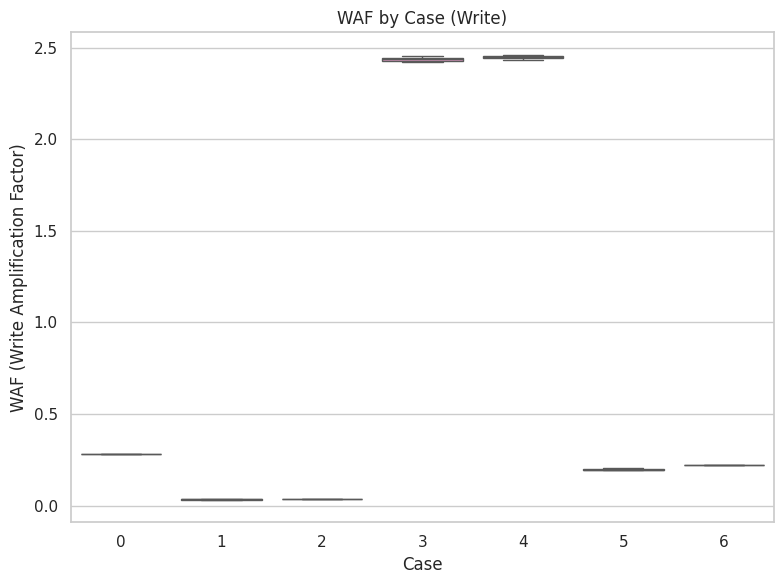

In [6]:
# Write 작업의 WAF
plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='WAF', data=df_write, palette='Set2', legend=False)
plt.title('WAF by Case (Write)')
plt.xlabel('Case')
plt.ylabel('WAF (Write Amplification Factor)')

plt.tight_layout()
plt.show()

/tmp/ipykernel_999/205539061.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='case', y='WAF', data=df_write_avg, palette='Set2')


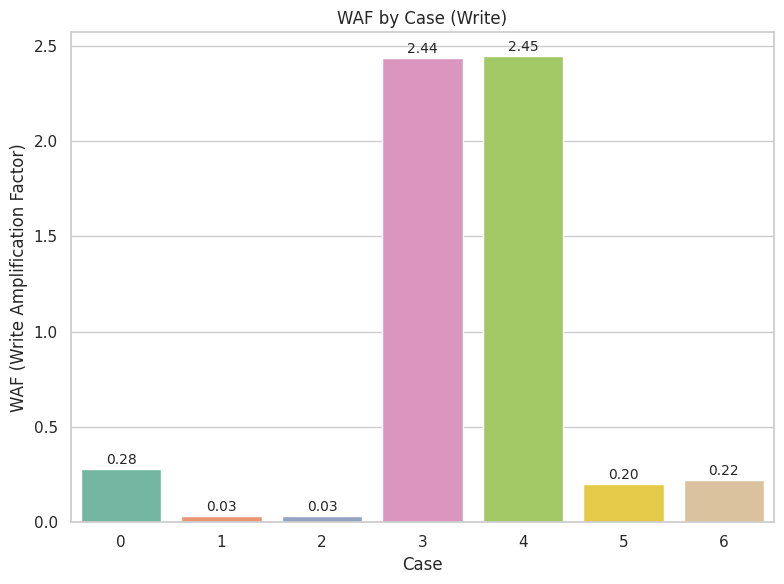

In [7]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='case', y='WAF', data=df_write_avg, palette='Set2')

# 막대 위에 값 표기
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('WAF by Case (Write)')
plt.xlabel('Case')
plt.ylabel('WAF (Write Amplification Factor)')
plt.tight_layout()
plt.show()

In [8]:
df_write.groupby('case')['WAF'].describe()

,count,mean,std,min,25%,50%,75%,max
case,,,,,,,,
0,3.0,0.281633,0.002244,0.279654,0.280414,0.281174,0.282623,0.284071
1,3.0,0.033389,0.001912,0.031200,0.032716,0.034231,0.034483,0.034734
2,3.0,0.034843,0.000022,0.034819,0.034833,0.034847,0.034855,0.034864
3,3.0,2.438007,0.016033,2.423157,2.429507,2.435857,2.445432,2.455007
4,3.0,2.448206,0.014402,2.433296,2.441289,2.449283,2.455661,2.462039
5,3.0,0.199211,0.005731,0.195621,0.195907,0.196192,0.201006,0.205820
6,3.0,0.222064,0.000116,0.221946,0.222007,0.222068,0.222123,0.222178


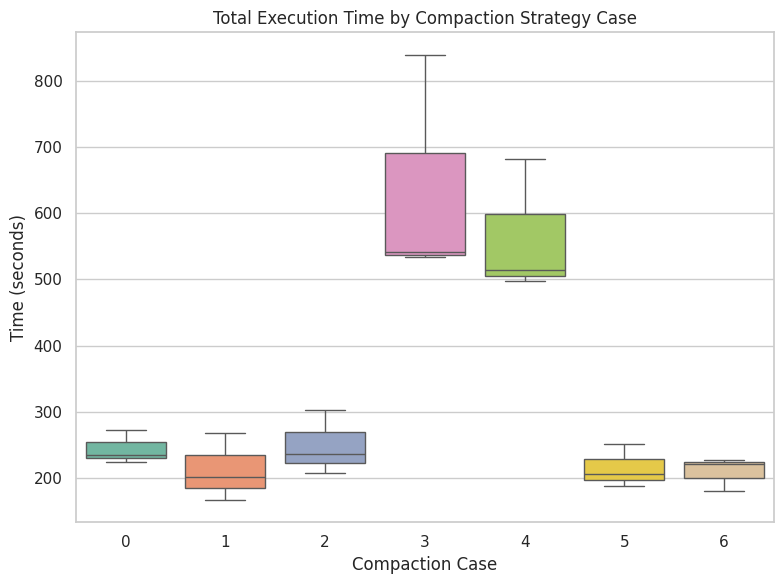

In [9]:
# 총 소요시간 
plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='time(s)', data=df_write, hue='case', palette='Set2', legend=False)
plt.title('Total Execution Time by Compaction Strategy Case')
plt.xlabel('Compaction Case')
plt.ylabel('Time (seconds)')
plt.tight_layout()
plt.show()

/tmp/ipykernel_999/1952208775.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='case', y='time(s)', data=df_write_avg, palette='Set2')


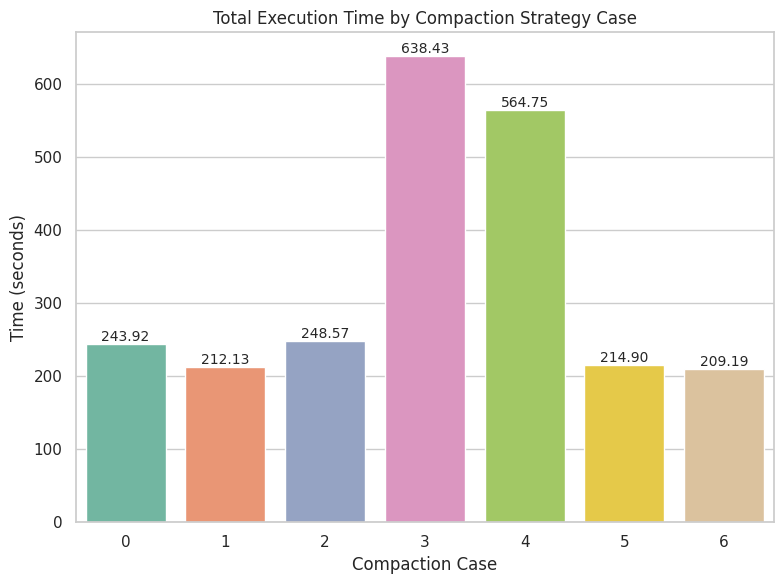

In [10]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='case', y='time(s)', data=df_write_avg, palette='Set2')

# 막대 위에 값 표기
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Total Execution Time by Compaction Strategy Case')
plt.xlabel('Compaction Case')
plt.ylabel('Time (seconds)')
plt.tight_layout()
plt.show()

In [11]:
df_write.groupby('case')['time(s)'].describe()

,count,mean,std,min,25%,50%,75%,max
case,,,,,,,,
0,3.0,243.920333,25.409096,224.189,229.5850,234.981,253.7860,272.591
1,3.0,212.126333,51.449354,166.549,184.2315,201.914,234.9150,267.916
2,3.0,248.571333,48.456228,207.475,221.8555,236.236,269.1195,302.003
3,3.0,638.434333,174.603796,533.634,537.6535,541.673,690.8345,839.996
4,3.0,564.752333,102.634431,496.992,505.7105,514.429,598.6325,682.836
5,3.0,214.903000,32.936837,187.347,196.6635,205.980,228.6810,251.382
6,3.0,209.190667,25.312046,180.184,200.3850,220.586,223.6940,226.802


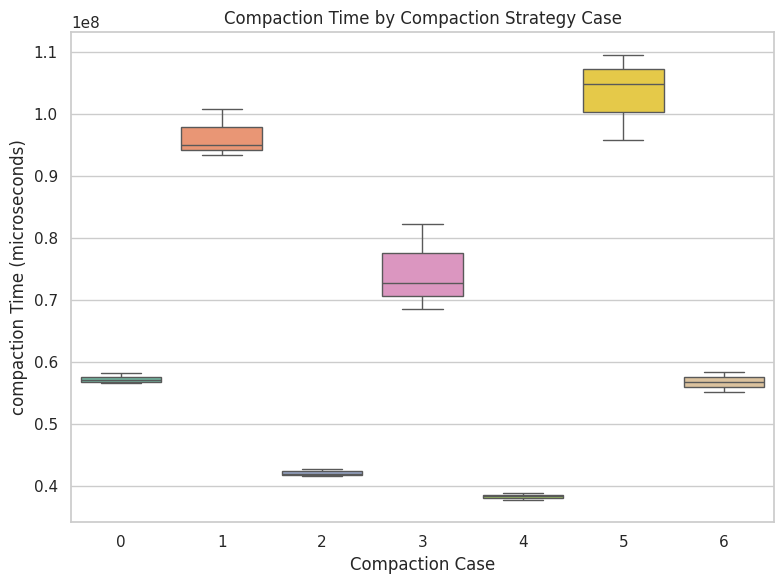

In [12]:
# 총 소요시간 
plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='rocksdb.compaction.total.time.cpu_micros', data=df_write, hue='case', palette='Set2', legend=False)
plt.title('Compaction Time by Compaction Strategy Case')
plt.xlabel('Compaction Case')
plt.ylabel('compaction Time (microseconds)')
plt.tight_layout()
plt.show()

/tmp/ipykernel_999/1693509766.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='case', y='rocksdb.compaction.total.time.cpu_micros', data=df_write_avg, palette='Set2')


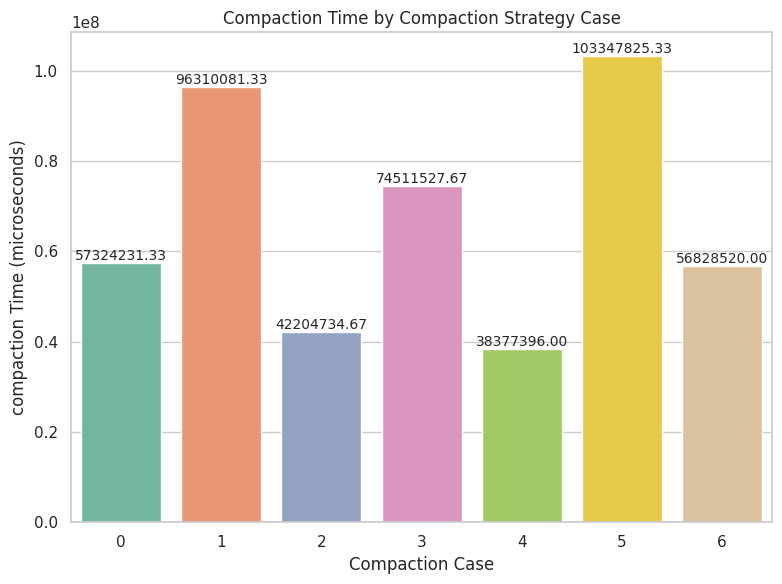

In [13]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='case', y='rocksdb.compaction.total.time.cpu_micros', data=df_write_avg, palette='Set2')

# 막대 위에 값 표기
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Compaction Time by Compaction Strategy Case')
plt.xlabel('Compaction Case')
plt.ylabel('compaction Time (microseconds)')
plt.tight_layout()
plt.show()

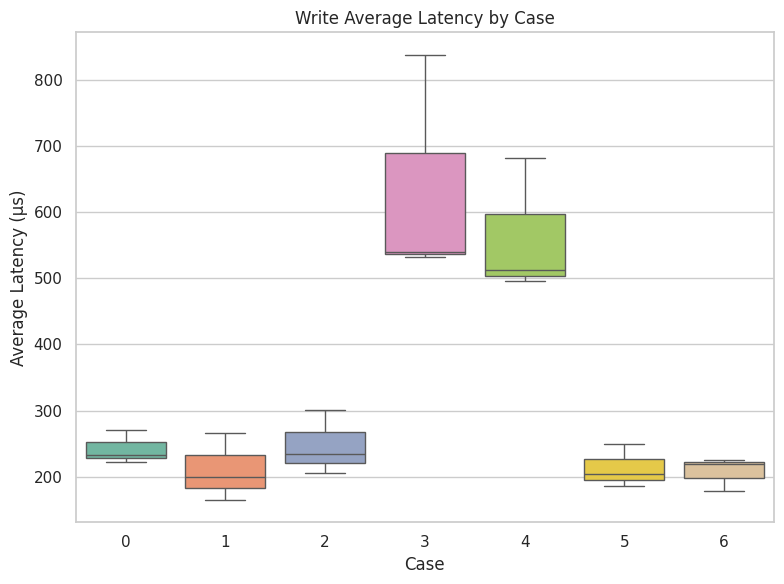

In [14]:
# Write Average Latency by Case
plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='write.AVG', data=df_write, hue='case', palette='Set2', legend=False)
plt.title('Write Average Latency by Case')
plt.ylabel('Average Latency (µs)')
plt.xlabel('Case')
plt.tight_layout()
plt.show()

/tmp/ipykernel_999/2588844532.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='case', y='write.AVG', data=df_write_avg, palette='Set2')


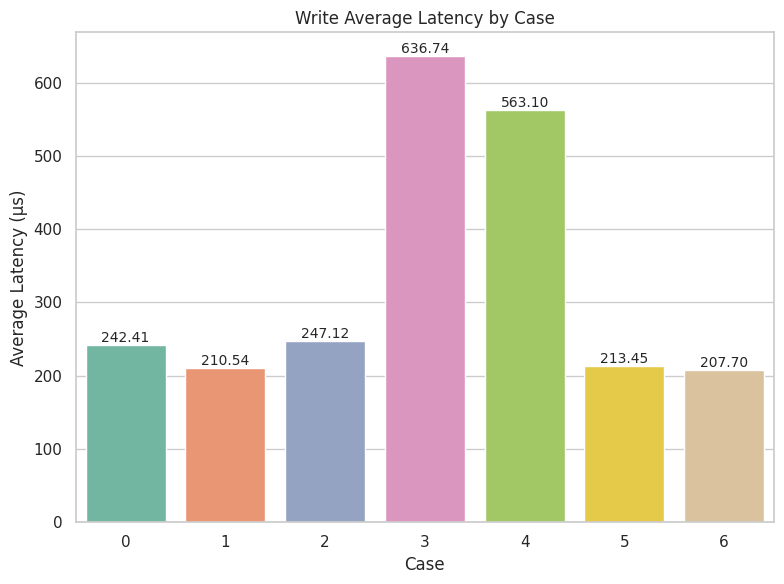

In [15]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='case', y='write.AVG', data=df_write_avg, palette='Set2')

# 막대 위에 값 표기
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Write Average Latency by Case')
plt.ylabel('Average Latency (µs)')
plt.xlabel('Case')
plt.tight_layout()
plt.show()

In [16]:
df_write.groupby('case')['write.AVG'].describe()

,count,mean,std,min,25%,50%,75%,max
case,,,,,,,,
0,3.0,242.409535,25.397697,222.644205,228.086814,233.529423,252.292200,271.054977
1,3.0,210.535522,51.353837,165.056572,182.688789,200.321007,233.274997,266.228986
2,3.0,247.122839,48.445300,206.043462,220.411351,234.779240,267.662528,300.545816
3,3.0,636.735644,174.361045,532.104818,536.094607,540.084395,689.051058,838.017720
4,3.0,563.095544,102.520719,495.493315,504.114849,512.736383,596.896658,681.056933
5,3.0,213.451593,32.970714,185.807323,195.205693,204.604063,227.273729,249.943394
6,3.0,207.702908,25.240649,178.778487,198.920691,219.062894,222.165118,225.267342


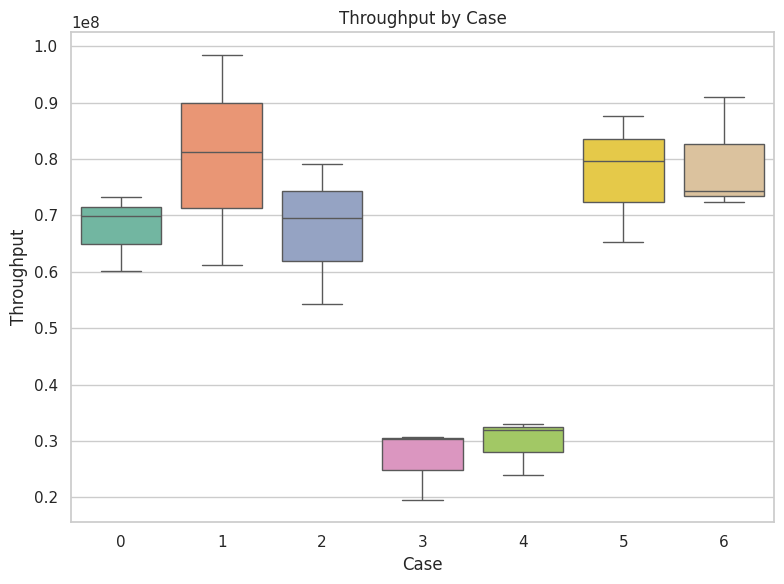

In [17]:
# Throughput
plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='throughput', data=df_write, hue='case', palette='Set2', legend=False)
plt.title('Throughput by Case')
plt.ylabel('Throughput')
plt.xlabel('Case')
plt.tight_layout()
plt.show()

/tmp/ipykernel_999/3585659375.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='case', y='throughput', data=df_write_avg, palette='Set2')


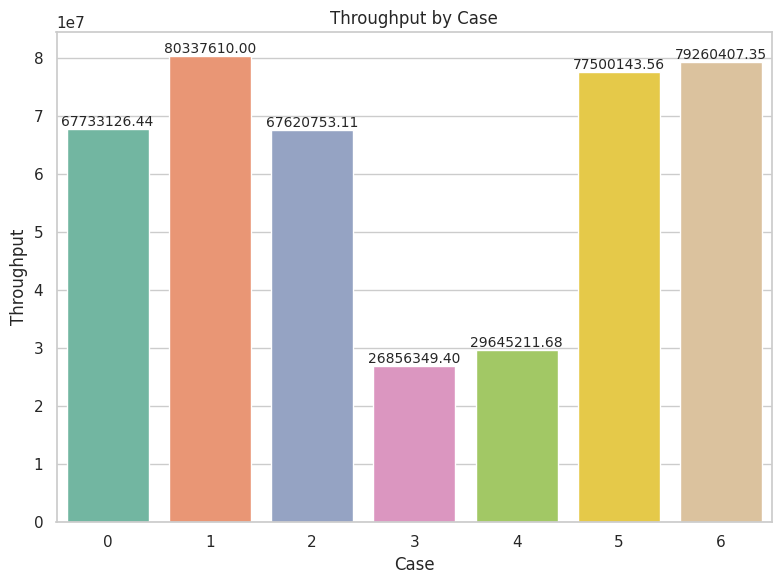

In [18]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='case', y='throughput', data=df_write_avg, palette='Set2')

# 막대 위에 값 표기
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Throughput by Case')
plt.ylabel('Throughput')
plt.xlabel('Case')
plt.tight_layout()
plt.show()

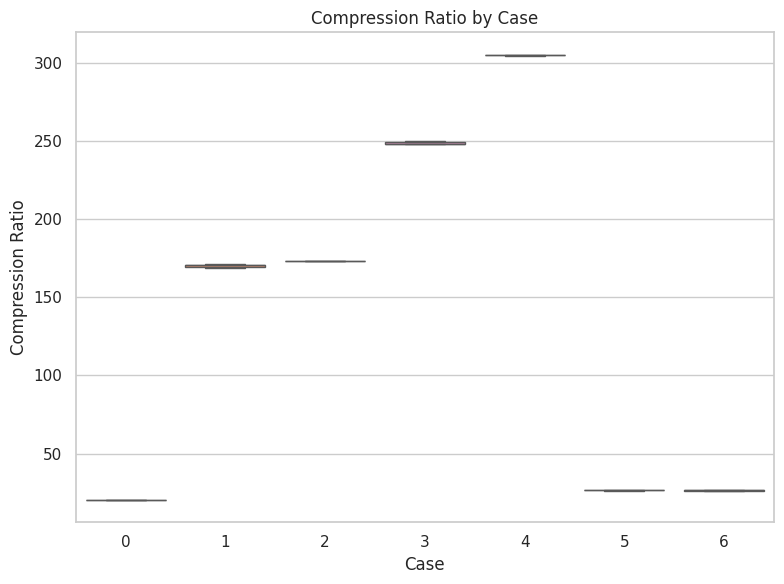

In [19]:
# compression ratio
plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='compression_ratio', data=df_write, hue='case', palette='Set2', legend=False)
plt.title('Compression Ratio by Case')
plt.ylabel('Compression Ratio')
plt.xlabel('Case')
plt.tight_layout()
plt.show()

/tmp/ipykernel_999/1352047339.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='case', y='compression_ratio', data=df_write_avg, palette='Set2')


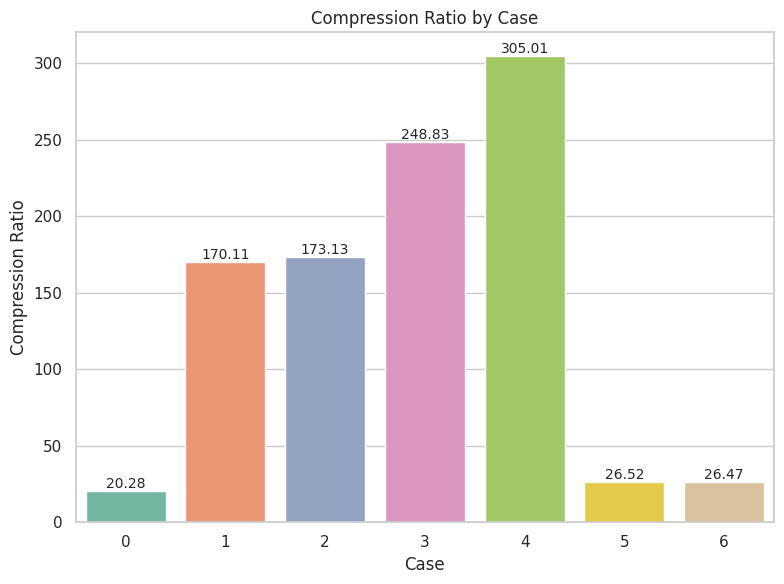

In [20]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='case', y='compression_ratio', data=df_write_avg, palette='Set2')

# 막대 위에 값 표기
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Compression Ratio by Case')
plt.ylabel('Compression Ratio')
plt.xlabel('Case')
plt.tight_layout()
plt.show()

## Read

/tmp/ipykernel_999/1373416525.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='case', y='RAF', data=df_read, palette='Set2', legend=False)


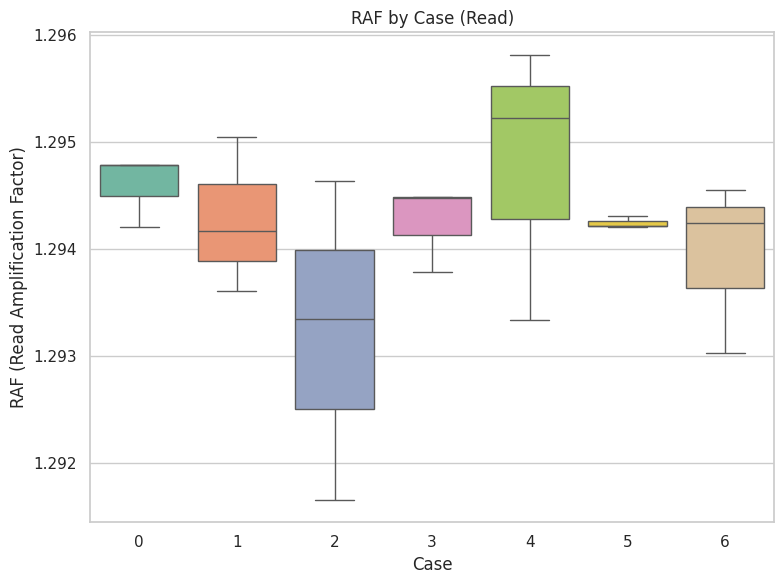

In [21]:
# RAF
plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='RAF', data=df_read, palette='Set2', legend=False)
plt.title('RAF by Case (Read)')
plt.xlabel('Case')
plt.ylabel('RAF (Read Amplification Factor)')

plt.tight_layout()
plt.show()

/tmp/ipykernel_999/2467909650.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='case', y='RAF', data=df_read_avg, palette='Set2')


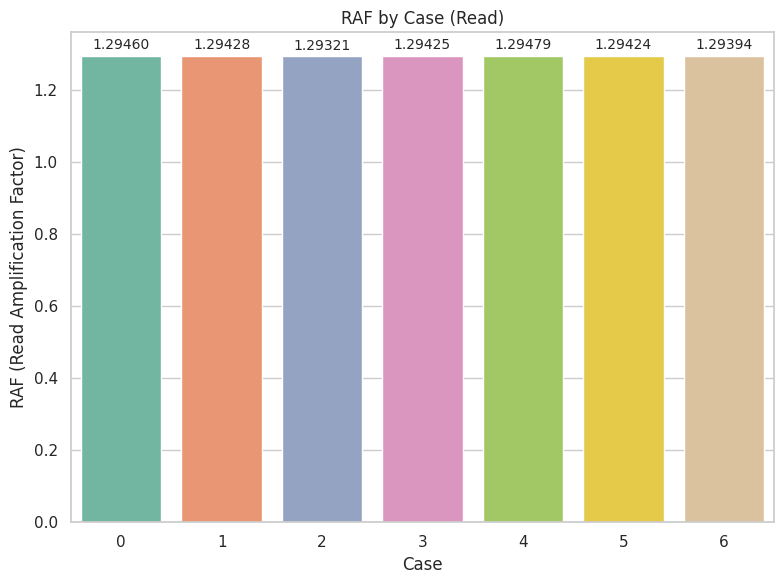

In [22]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='case', y='RAF', data=df_read_avg, palette='Set2')

# 막대 위에 값 표기
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
            f'{height:.5f}', ha='center', va='bottom', fontsize=10)

plt.title('RAF by Case (Read)')
plt.xlabel('Case')
plt.ylabel('RAF (Read Amplification Factor)')
plt.tight_layout()
plt.show()

In [23]:
df_read.groupby('case')['RAF'].describe()

,count,mean,std,min,25%,50%,75%,max
case,,,,,,,,
0,3.0,1.294595,0.000335,1.294209,1.294498,1.294788,1.294788,1.294788
1,3.0,1.294276,0.000723,1.293611,1.293892,1.294173,1.294609,1.295045
2,3.0,1.293215,0.001494,1.291659,1.292504,1.293348,1.293993,1.294637
3,3.0,1.294252,0.000400,1.293790,1.294135,1.294480,1.294482,1.294485
4,3.0,1.294793,0.001290,1.293343,1.294282,1.295221,1.295518,1.295815
5,3.0,1.294244,0.000057,1.294204,1.294212,1.294220,1.294265,1.294309
6,3.0,1.293942,0.000803,1.293032,1.293637,1.294242,1.294397,1.294552


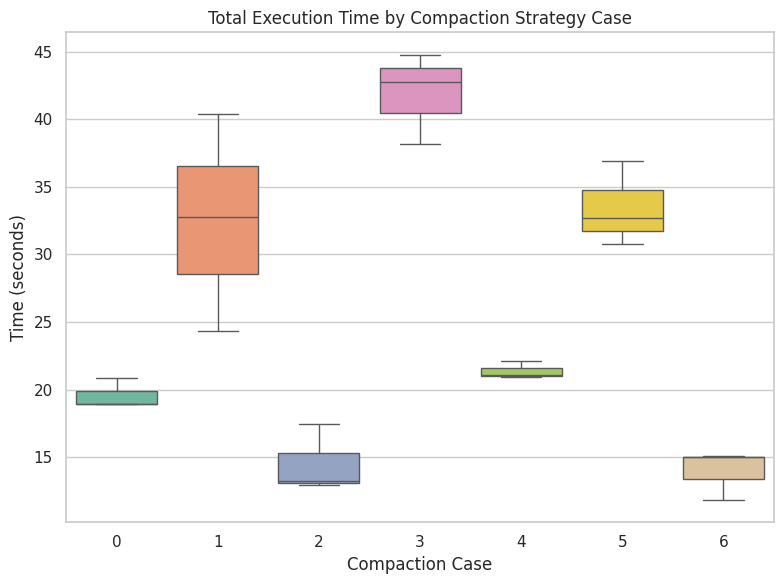

In [24]:
# 총 소요시간 
plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='time(s)', data=df_read, hue='case', palette='Set2', legend=False)
plt.title('Total Execution Time by Compaction Strategy Case')
plt.xlabel('Compaction Case')
plt.ylabel('Time (seconds)')
plt.tight_layout()
plt.show()

/tmp/ipykernel_999/2413868267.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='case', y='time(s)', data=df_read_avg, palette='Set2')


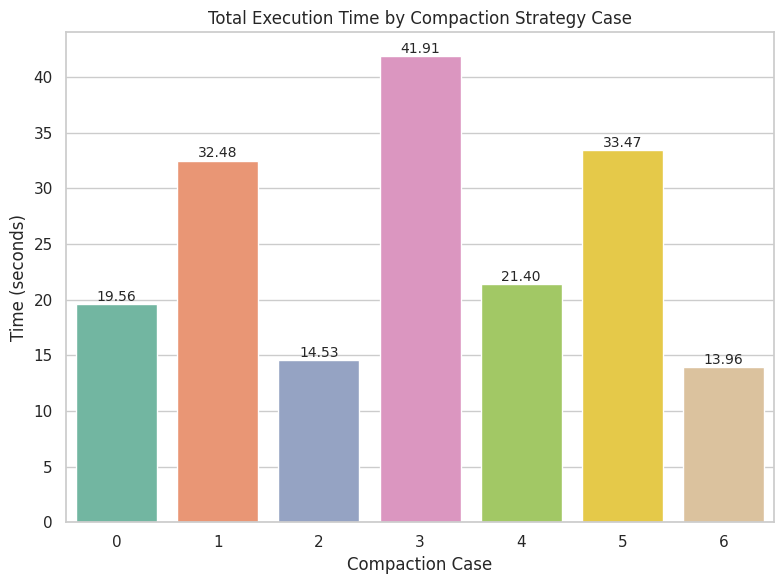

In [25]:

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='case', y='time(s)', data=df_read_avg, palette='Set2')

# 막대 위에 값 표기
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Total Execution Time by Compaction Strategy Case')
plt.xlabel('Compaction Case')
plt.ylabel('Time (seconds)')
plt.tight_layout()
plt.show()

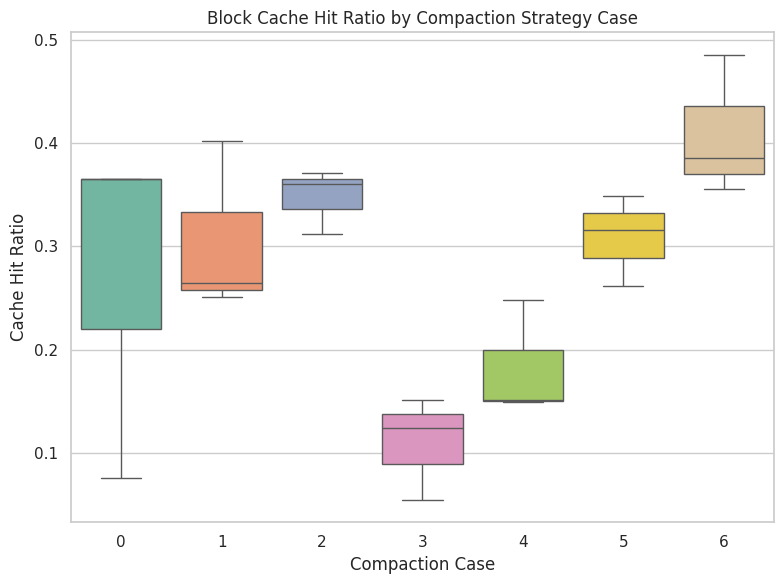

In [26]:
# ------------------------------------
# 3. Block Cache Hit Ratio by Case
# ------------------------------------
plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='cache_hit_ratio', data=df_read, hue='case', palette='Set2', legend=False)
plt.title('Block Cache Hit Ratio by Compaction Strategy Case')
plt.xlabel('Compaction Case')
plt.ylabel('Cache Hit Ratio')
plt.tight_layout()
plt.show()

/tmp/ipykernel_999/921772678.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='case', y='cache_hit_ratio', data=df_read_avg, palette='Set2')


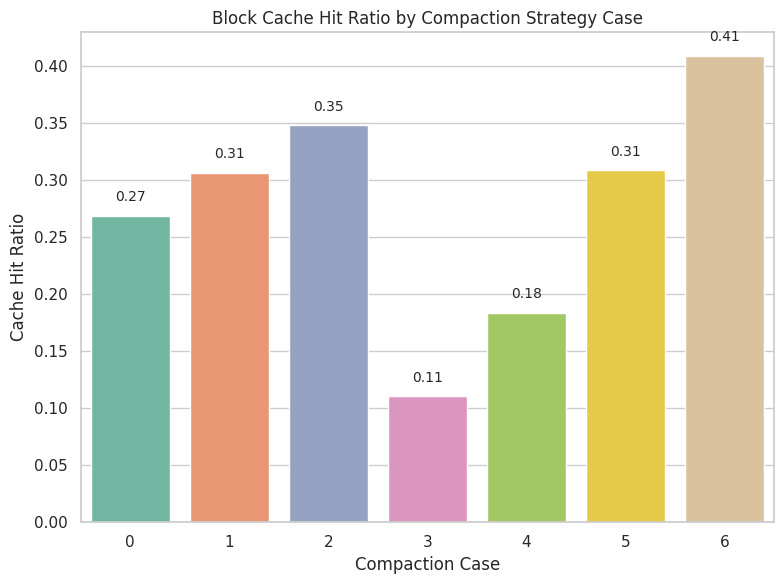

In [27]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='case', y='cache_hit_ratio', data=df_read_avg, palette='Set2')

# 막대 위에 값 표기
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Block Cache Hit Ratio by Compaction Strategy Case')
plt.xlabel('Compaction Case')
plt.ylabel('Cache Hit Ratio')
plt.tight_layout()
plt.show()

In [28]:
df_read.groupby('case')[['RAF', 'get.AVG']].mean(numeric_only=True)

,RAF,get.AVG
case,,
0,1.294595,18.343301
1,1.294276,31.271251
2,1.293215,13.362530
3,1.294252,40.473597
4,1.294793,19.952191
5,1.294244,32.199039
6,1.293942,12.787620


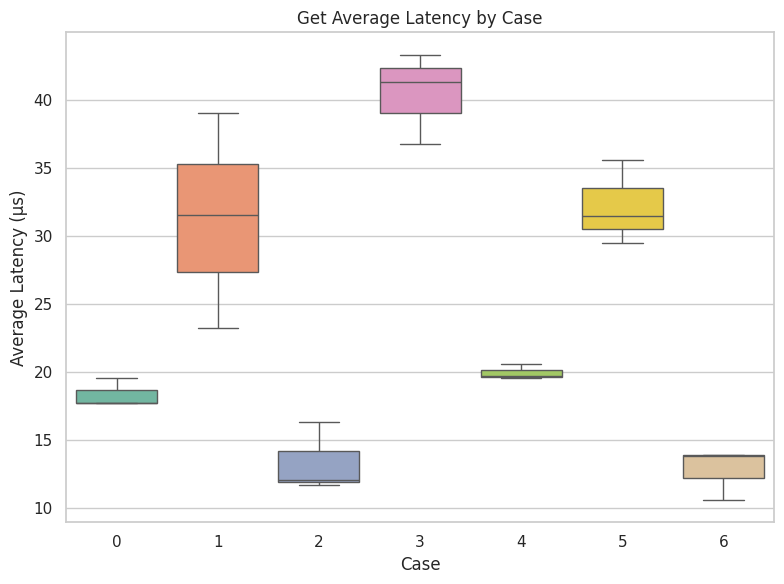

In [29]:
# Latency
plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='get.AVG', data=df_read, hue='case', palette='Set2', legend=False)
plt.title('Get Average Latency by Case')
plt.ylabel('Average Latency (µs)')
plt.xlabel('Case')
plt.tight_layout()
plt.show()

/tmp/ipykernel_999/2039202209.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='case', y='get.AVG', data=df_read_avg, palette='Set2')


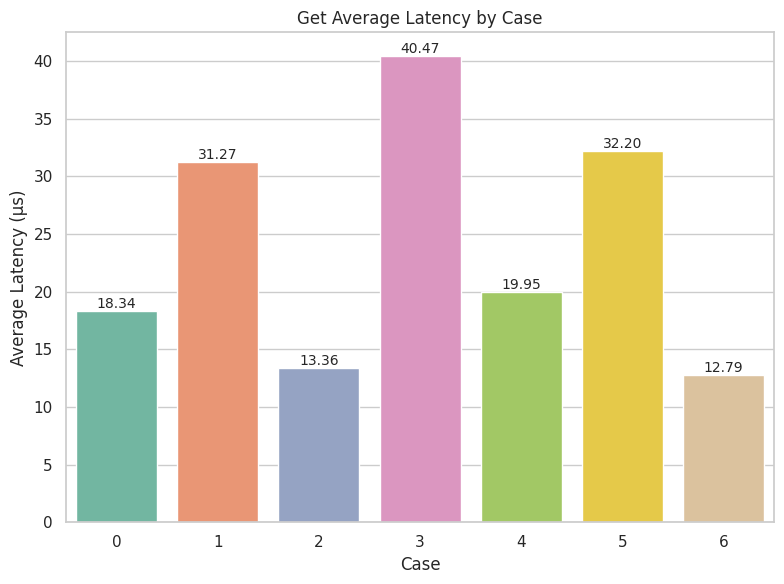

In [30]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='case', y='get.AVG', data=df_read_avg, palette='Set2')

# 막대 위에 값 표기
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Get Average Latency by Case')
plt.ylabel('Average Latency (µs)')
plt.xlabel('Case')
plt.tight_layout()
plt.show()

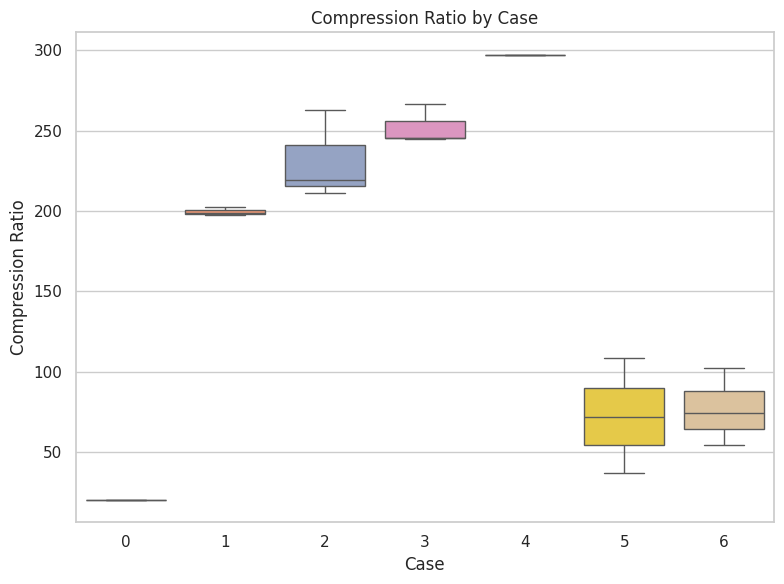

In [31]:
# compression ratio
plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='compression_ratio', data=df_read, hue='case', palette='Set2', legend=False)
plt.title('Compression Ratio by Case')
plt.ylabel('Compression Ratio')
plt.xlabel('Case')
plt.tight_layout()
plt.show()

/tmp/ipykernel_999/1598831252.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='case', y='compression_ratio', data=df_read_avg, palette='Set2')


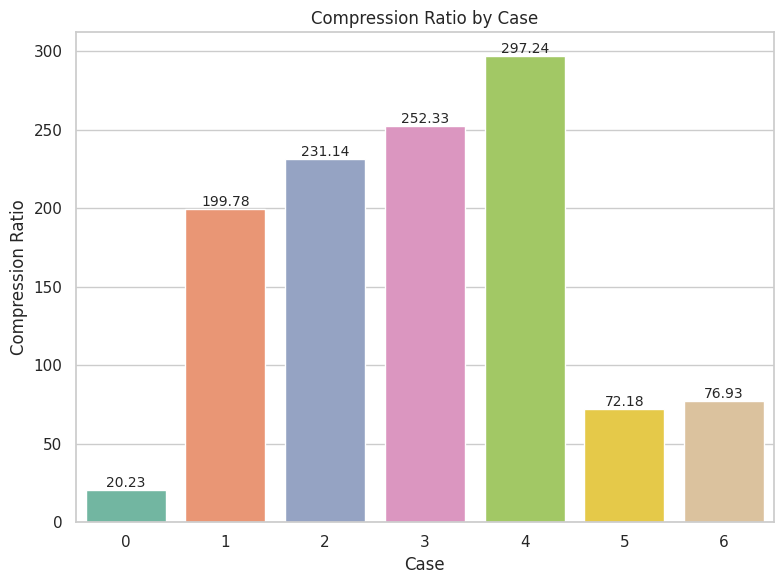

In [32]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='case', y='compression_ratio', data=df_read_avg, palette='Set2')

# 막대 위에 값 표기
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Compression Ratio by Case')
plt.ylabel('Compression Ratio')
plt.xlabel('Case')
plt.tight_layout()
plt.show()